**Вариант 6.4**
* 1. Убираем список столбцов: 'id_07', 'id_08', 'id_21', 'id_22', 'id_24', 'id_25', 'id_26', 'id_23',  'id_27' (baseline)
* 2. Убираем столбцы, которые убрали после 2-й попытки - показавшие 0 в feature_importance и также имеющие высокие коэффициенты корреляции
* 3. Добавляем 3 столбца: сгруппированная карта, сгруппированный адрес, сгруппированный dist.
* 4. Убираем столбцец D9 - столбец со временем операции
* 5. Добавляем столбец с часами операции, вычисленными из TransactionDT, а также добавим день, вычисленный из TransactionDT
*  6.Удаляем TransactionDT
* 7. Удаляем больше столбцов V оставили 274 столбца всего



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
%matplotlib inline

In [ ]:
import gc
import sys

In [ ]:
feature_cat_for_cat=['ProductCD', 'P_emaildomain',
 'R_emaildomain', 'DeviceType', 'DeviceInfo',
 'addr1', 'addr2', 'card1', 'card2', 'card3',
 'card4', 'card5', 'card6', 'id_12', 'id_13',
 'id_14', 'id_15', 'id_16', 'id_17', 'id_18',
 'id_19', 'id_20', 'id_28', 'id_29', 'id_30',
 'id_31', 'id_33', 'id_34', 'id_35', 'id_36',
 'id_37', 'id_38', 'M1', 'M2', 'M3', 'M4',
 'M5', 'M6', 'M7', 'M8', 'M9', 'card_card',
 'dist', 'addr']

In [ ]:
# 'ProductCD', 'P_emaildomain', 'R_emaildomain',
#  'DeviceType', 'DeviceInfo', 'addr1', 'addr2',
#  'card1', 'card2', 'card3', 'card4', 'card5',
#  'card6', 'id_12', 'id_13', 'id_14', 'id_15',
#  'id_16', 'id_17', 'id_18','id_19', 'id_20',
#  'id_28', 'id_29', 'id_30', 'id_31', 'id_33',
#  'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
#  'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
#  'M8', 'M9', 'card_card', 'dist', 'addr'

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/X_train_06_02_try6_4.csv'
X_train = pd.read_csv(path_to_data,  index_col='TransactionID')
X_train.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D10,D11,D12,D13,...,V316,V317,V318,V319,V320,V321,V322,V326,V332,V333,V334,V335,V337,V339,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card_card,dist,addr,Hr,day
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3126425,87.0,W,10847,302,150,visa,226,credit,325,87,NaN,NaN,anonymous.com,,139.0,118.0,0.0,0.0,86.0,93.0,0.0,0.0,82.0,0.0,99.0,0.0,410.0,112.0,512.0,512.0,1.0,512.0,1.0,NaN,NaN,NaN,512.0,NaN,NaN,NaN,...,0.0,2577.0,157.0,0.0,736.0,736.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,10847302.0150.0visacredit226.0,nannan,325.087.0,0.916667,22.0
3138318,500.0,R,15446,460,150,mastercard,224,debit,226,87,NaN,NaN,aol.com,gmail.com,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NotFound,52,-360,New,NotFound,166,,529,299,New,NotFound,Windows 7,ie 11.0 for desktop,1600x900,match_status:2,T,F,T,T,desktop,Trident/7.0,15446460.0150.0mastercarddebit224.0,nannan,226.087.0,0.000000,0.0
3280546,117.0,W,11127,567,150,mastercard,219,debit,204,87,NaN,NaN,aol.com,,1.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0,13.0,1.0,423.0,423.0,0.0,423.0,3.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,...,117.0,234.0,234.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,11127567.0150.0mastercarddebit219.0,nannan,204.087.0,0.875000,21.0
3442167,117.0,W,7919,194,150,mastercard,166,debit,126,87,NaN,NaN,,,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,22.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,482.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,7919194.0150.0mastercarddebit166.0,nannan,126.087.0,0.750000,18.0
3479621,49.0,W,2485,555,150,visa,226,debit,251,87,15.0,NaN,,,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,19.0,2.0,159.0,159.0,12.0,NaN,NaN,NaN,NaN,NaN,272.0,275.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,2485555.0150.0visadebit226.0,15.0nan,251.087.0,0.791667,19.0


In [ ]:
%time
path_to_data = '/content/drive/MyDrive/Classroom/X_validate_06_02_try6_4.csv'
X_validate = pd.read_csv(path_to_data,  index_col='TransactionID')
X_validate.head()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D10,D11,D12,D13,...,V316,V317,V318,V319,V320,V321,V322,V326,V332,V333,V334,V335,V337,V339,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card_card,dist,addr,Hr,day
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3457624,724.000,W,7826,481,150,mastercard,224,debit,387,87,NaN,NaN,aol.com,,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0,2.0,2.0,0.0,NaN,NaN,145.0,0.0,NaN,NaN,NaN,145.0,0.0,NaN,NaN,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,7826481.0150.0mastercarddebit224.0,nannan,387.087.0,0.625000,15.0
3552820,108.500,W,12544,321,150,visa,226,debit,476,87,0.0,NaN,yahoo.com,,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,7.0,2.0,122.0,122.0,5.0,347.0,5.0,NaN,NaN,NaN,347.0,122.0,NaN,NaN,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,12544321.0150.0visadebit226.0,0.0nan,476.087.0,0.666667,16.0
3271083,47.950,W,9400,111,150,mastercard,224,debit,315,87,6.0,NaN,gmail.com,,1.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,32.0,32.0,22.0,22.0,22.0,NaN,NaN,NaN,33.0,33.0,NaN,NaN,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,9400111.0150.0mastercarddebit224.0,6.0nan,315.087.0,0.666667,16.0
3226689,100.599,C,15885,545,185,visa,138,debit,,,NaN,NaN,gmail.com,gmail.com,2.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,...,100.5993,100.5993,100.5993,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,15885545.0185.0visadebit138.0,nannan,nannan,0.666667,16.0
3268855,107.950,W,15497,490,150,visa,226,debit,299,87,NaN,NaN,hotmail.com,,10.0,14.0,0.0,0.0,11.0,8.0,0.0,0.0,6.0,0.0,10.0,0.0,43.0,9.0,549.0,549.0,16.0,549.0,16.0,NaN,NaN,NaN,446.0,NaN,NaN,NaN,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,15497490.0150.0visadebit226.0,nannan,299.087.0,0.666667,16.0


In [ ]:
%time
path_to_data = '/content/drive/MyDrive/Classroom/X_test_06_02_try6_4.csv'
X_test = pd.read_csv(path_to_data,  index_col='TransactionID')
X_test.head()

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D10,D11,D12,D13,...,V316,V317,V318,V319,V320,V321,V322,V326,V332,V333,V334,V335,V337,V339,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,card_card,dist,addr,Hr,day
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,31.95,W,10409,111,150,visa,226,debit,170,87,1.0,NaN,gmail.com,,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,418.0,203.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,10409111.0150.0visadebit226.0,1.0nan,170.087.0,0.0,0.0
3663550,49.00,W,4272,111,150,visa,226,debit,299,87,4.0,NaN,aol.com,,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,231.0,634.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,4272111.0150.0visadebit226.0,4.0nan,299.087.0,0.0,0.0
3663551,171.00,W,4476,574,150,visa,226,debit,472,87,2635.0,NaN,hotmail.com,,2.0,2.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,2.0,0.0,22.0,2.0,137.0,137.0,10.0,97.0,10.0,NaN,NaN,NaN,136.0,136.0,NaN,NaN,...,0.0,0.0,0.0,0.0,263.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,4476574.0150.0visadebit226.0,2635.0nan,472.087.0,0.0,0.0
3663552,284.95,W,10989,360,150,visa,166,debit,205,87,17.0,NaN,gmail.com,,5.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,7.0,4.0,42.0,42.0,41.0,242.0,41.0,NaN,NaN,NaN,242.0,242.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,10989360.0150.0visadebit166.0,17.0nan,205.087.0,0.0,0.0
3663553,67.95,W,18018,452,150,mastercard,117,debit,264,87,6.0,NaN,gmail.com,,6.0,6.0,0.0,0.0,2.0,5.0,0.0,0.0,5.0,0.0,6.0,0.0,14.0,6.0,22.0,22.0,0.0,22.0,0.0,NaN,NaN,NaN,22.0,22.0,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,,,,,,,,,,,,,,,,,,,,18018452.0150.0mastercarddebit117.0,6.0nan,264.087.0,0.0,0.0


In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/y_train_06_02_try65_4.csv'
y_train = pd.read_csv(path_to_data)
y_train.head()

,isFraud
0,0
1,0
2,0
3,0
4,0


In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/y_validatet_06_02_try6_4.csv'
y_validate = pd.read_csv(path_to_data)
y_validate.head()

,isFraud
0,0
1,0
2,0
3,0
4,0


In [ ]:
gc.collect()

292

In [ ]:
sys.getsizeof(X_train) / 1024 ** 2

2358.0613832473755

In [ ]:
sys.getsizeof(X_test) / 1024 ** 2

2683.862072944641

In [ ]:
sys.getsizeof(X_validate) / 1024 ** 2

786.0538263320923

In [ ]:
path_to_data = '/content/drive/MyDrive/Classroom/ID_05_02.csv'
ID = pd.read_csv(path_to_data)
ID.head()

,TransactionID
0,3663549
1,3663550
2,3663551
3,3663552
4,3663553


In [ ]:
gc.collect()

193

In [ ]:
ID

#CatBoost

In [ ]:
!pip install -q catboost shap

     |████████████████████████████████| 76.1 MB 1.2 MB/s 
     |████████████████████████████████| 564 kB 48.4 MB/s 


In [ ]:
import catboost
from catboost import CatBoostClassifier

import shap
import sklearn.model_selection
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
gc.collect()

59

In [ ]:
train_pool = catboost.Pool(
    X_train,
    label=y_train,
    cat_features=feature_cat_for_cat
)
val_pool = catboost.Pool(
    X_validate,
    label=y_validate,
    cat_features=feature_cat_for_cat
)
test_pool = catboost.Pool(
    X_test,
    cat_features=feature_cat_for_cat
)

In [ ]:
!rm -rf 'catboost_clf_find_fraud/snapshot.bkp'

In [ ]:
catboost_train_dir = 'catboost_clf_find_fraud'
clf = catboost.CatBoostClassifier(
    loss_function='Logloss',
    custom_loss='AUC',
    logging_level='Silent',
    eval_metric='AUC',
    od_pval=0.05,
    od_wait=20,
    # early_stopping_rounds=20,
    # random_seed=52,
    train_dir=catboost_train_dir,
    # task_type='CPU',
    task_type='GPU',
    devices='0',
    auto_class_weights='Balanced',
    use_best_model=True
)
clf.fit(
    train_pool, 
    eval_set=val_pool,
    plot=True,
    save_snapshot=True,
    snapshot_file='snapshot.bkp',
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
clf.best_score_

{'learn': {'AUC': 0.9713953137397766, 'Logloss': 0.22890973982759938},
 'validation': {'AUC': 0.9705962538719177, 'Logloss': 0.2210932328684965}}

In [ ]:
clf.best_iteration_

999

In [ ]:
gc.collect()

584

# Сохранение модели в файл
model.save_model('catboost 5.08.22')
# Загрузка модели из файла
from_file = cb.CatBoostClassifier()
from_file.load_model('catboost 5.08.22')

In [ ]:
clf.save_model('catboost 6.08.22')

In [ ]:
clf = catboost.CatBoostClassifier()
clf.load_model('catboost 6.08.22')

Предсказываем

In [ ]:
vt_pool = catboost.Pool(
    X_validate,
    cat_features=feature_cat_for_cat
    )  

tt_pool = catboost.Pool(
    X_train,
    cat_features=feature_cat_for_cat
) 
y_pred_train = clf.predict(tt_pool)
y_pred_val = clf.predict(vt_pool)
y_pred_submit = clf.predict(test_pool)


In [ ]:
y_pred_proba_submit = clf.predict_proba(test_pool)

In [ ]:
gc.collect()

88

Сохраняем результат

In [ ]:
len(y_pred_submit)

506691

In [ ]:
ID

,TransactionID
0,3663549
1,3663550
2,3663551
3,3663552
4,3663553
...,...
506686,4170235
506687,4170236
506688,4170237
506689,4170238


In [ ]:
y_pred_submit.sum()/X_test.shape[0]

0.09122917123059221

In [ ]:
res=pd.Series(y_pred_submit)

In [ ]:
res

0         0
1         0
2         0
3         0
4         0
         ..
506686    0
506687    0
506688    0
506689    0
506690    0
Length: 506691, dtype: int64

In [ ]:
y_pred_submit_res=pd.DataFrame(res, columns=['isFraud'])

In [ ]:
y_pred_submit_res=pd.concat([ID, y_pred_submit_res], axis=1)

In [ ]:
y_pred_submit_res

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0
...,...,...
506686,4170235,0
506687,4170236,0
506688,4170237,0
506689,4170238,0


In [ ]:
y_pred_submit_res.to_csv('/content/drive/MyDrive/Classroom/submit_isFraud_06_02_try6_4.csv', index=False)

In [ ]:
y.sum()/y.shape[0]

isFraud    0.03499
dtype: float64

In [ ]:
y_pred_submit_res.isFraud.sum()/y_pred_submit_res.shape[0]

0.09122917123059221

In [ ]:
proba=pd.DataFrame(y_pred_proba_submit)

In [ ]:
proba

,0,1
0,0.979801,0.020199
1,0.813978,0.186022
2,0.994002,0.005998
3,0.956343,0.043657
4,0.929936,0.070064
...,...,...
506686,0.729123,0.270877
506687,0.909539,0.090461
506688,0.864358,0.135642
506689,0.783868,0.216132


In [ ]:
proba[1]

0         0.008725
1         0.019236
2         0.000476
3         0.007880
4         0.036358
            ...   
506686    0.214238
506687    0.032585
506688    0.085328
506689    0.112674
506690    0.062610
Name: 1, Length: 506691, dtype: float64

In [ ]:
submission = pd.DataFrame(columns=['TransactionID'], data= ID)
submission['isFraud'] = proba[1]
submission.head()
# submission.isFraud.value_counts()

,TransactionID,isFraud
0,3663549,0.020199
1,3663550,0.186022
2,3663551,0.005998
3,3663552,0.043657
4,3663553,0.070064


In [ ]:
submission.isFraud.value_counts()

0.851243    10
0.050623     6
0.990885     6
0.008221     6
0.999338     5
            ..
0.070424     1
0.045712     1
0.080231     1
0.044641     1
0.100462     1
Name: isFraud, Length: 506234, dtype: int64

In [ ]:
submission.to_csv('/content/drive/MyDrive/Classroom/submit_isFraud_06_02_try6_3_proba.csv', index=False)

#Анализируем результат

In [ ]:
gc.collect()

248

График обучения

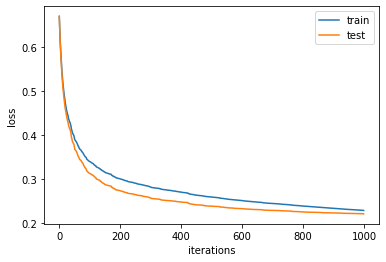

In [ ]:
hist = clf.get_evals_result()
plt.plot(list(hist['learn'].values())[0], label= 'train')
plt.plot(list(hist['validation'].values())[0], label = 'test')
plt.ylabel('loss')
plt.xlabel('iterations')
plt.legend()
plt.show()

In [ ]:
feature_import=sorted(
    zip(X_train.columns, clf.feature_importances_), 
    key=lambda p: p[1], 
    reverse=True
)

Сохраняем feature_import

In [ ]:
feature_import

[('C1', 7.166967262442168),
 ('card1', 5.831428207868163),
 ('C14', 4.442678219332582),
 ('TransactionAmt', 4.1660810209057715),
 ('card_card', 4.136573641639178),
 ('P_emaildomain', 3.4717807896868162),
 ('C13', 3.2986595854192884),
 ('dist', 3.1096590442697467),
 ('addr1', 2.923077096699045),
 ('card2', 2.4531535191085427),
 ('M5', 2.3380819150415966),
 ('DeviceInfo', 1.9553414016263935),
 ('D2', 1.8926735251967406),
 ('C6', 1.721515924037286),
 ('R_emaildomain', 1.6315421200134836),
 ('V258', 1.5917519469046566),
 ('D15', 1.5476790262444797),
 ('id_19', 1.4432230705044995),
 ('C11', 1.3649188240884342),
 ('M6', 1.2753333694241642),
 ('dist1', 1.16558654004413),
 ('card5', 1.1525819754318276),
 ('M4', 1.1283230012658736),
 ('ProductCD', 1.097265919001573),
 ('C5', 1.0398904025456943),
 ('addr', 1.014200826827139),
 ('V308', 1.005352143479031),
 ('D4', 0.9647404568377648),
 ('C2', 0.9409218095674778),
 ('V317', 0.9346729751294952),
 ('id_31', 0.9256376561903829),
 ('id_20', 0.91355691

In [ ]:
feature_import=pd.DataFrame(feature_import, columns=['feature', 'importance'])

In [ ]:
feature_import.to_csv('/content/drive/MyDrive/Classroom/feature_import_06_02_v6_4.csv', index=False)

In [ ]:
del X_test
gc.collect()

2830

In [ ]:
gc.collect()

88

In [ ]:
shap_info = clf.get_feature_importance(
    data=train_pool, 
    type='ShapValues', 
    verbose=10000
)
shap_values = shap_info[:,:-1]
base_values = shap_info[:,-1]

Processing trees...
128/1000 trees processed	passed time: 485ms	remaining time: 3.3s
1000/1000 trees processed	passed time: 2.69s	remaining time: 0us
Processing documents...
128/442905 documents processed	passed time: 29.1ms	remaining time: 1m 40s
10112/442905 documents processed	passed time: 1.94s	remaining time: 1m 23s
20096/442905 documents processed	passed time: 3.85s	remaining time: 1m 21s
30080/442905 documents processed	passed time: 5.83s	remaining time: 1m 19s
40064/442905 documents processed	passed time: 7.79s	remaining time: 1m 18s
50048/442905 documents processed	passed time: 9.77s	remaining time: 1m 16s
60032/442905 documents processed	passed time: 11.7s	remaining time: 1m 14s
70016/442905 documents processed	passed time: 13.5s	remaining time: 1m 11s
80128/442905 documents processed	passed time: 15.4s	remaining time: 1m 9s
90112/442905 documents processed	passed time: 17.3s	remaining time: 1m 7s
100096/442905 documents processed	passed time: 19.2s	remaining time: 1m 5s
1100

In [ ]:
/content/catboost_clf_find_fraud/snapshot.bkp

In [ ]:
shap.summary_plot(shap_values, X_train)